In [1]:
import sys
import time
import math
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
%matplotlib inline

sys.path.insert(1, '../src/')
import os.path
import kde as kde
import scms as scms

In [2]:
data = np.loadtxt('P_DeltaRc.1000.ascii', unpack=True, skiprows=1)
R = np.sqrt(data[1,:] ** 2 + data[2,:] ** 2)
z = data[3,:]
vz = data[6,:]
vR = (data[1,:] * data[4,:] + data[2,:] * data[5,:]) / R
vp = (data[1,:] * data[5,:] - data[2,:] * data[4,:]) / R
Lz = vp * R

In [33]:
points = np.vstack([z, vz]).T

In [34]:
def plot_2d_histogram(x, y, bins=100, filename="test.png", title=""):
    hist, xe, ye = np.histogram2d(x,y,bins=bins)
    fig = plt.pcolormesh(xe,ye,hist.T,cmap='RdPu')
    plt.xlabel("$z$")
    plt.ylabel("$v_z$")
    plt.xlim((-1.5, 1.5))
    plt.ylim((-0.8, 0.8))
    plt.title(title)
    plt.colorbar()
    plt.savefig(filename, dpi=300)
    plt.show()

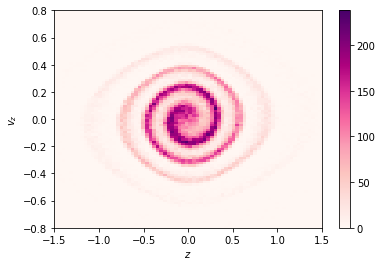

In [35]:
plot_2d_histogram(points[:,0], points[:,1], bins=100, filename="original.png")

In [36]:
mean = [0, 0]
cov = [[0.5 ** 2, 0], [0, 0.4 ** 2]]
bg_points = np.random.multivariate_normal(mean, cov, 800000)
print("Signal2Noise Ratio: {}".format(points.shape[0] / bg_points.shape[0]))

Signal2Noise Ratio: 0.125


In [37]:
points = np.concatenate([points, bg_points])

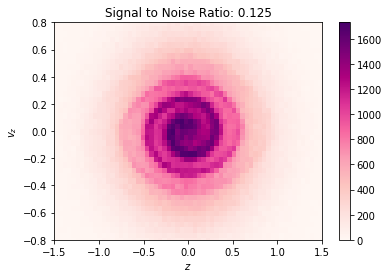

In [38]:
plot_2d_histogram(points[:,0], points[:,1], filename="s2n0p125.png", title="Signal to Noise Ratio: 0.125")

In [39]:
x, y = np.linspace(-2,2,256), np.linspace(-0.9,0.9,256)
xx, yy = np.meshgrid(x, y)
xy = np.array([xx.flatten(), yy.flatten()]).T

In [40]:
start_time = time.time()
bw = min(np.std(points[:,0]), np.std(points[:,1])) * 0.10378908155562136
pdf2 = kde.kde2(points, x, y, bandwidth=bw)
end_time = time.time()
print("Computation Time: {:.2f} seconds".format(end_time - start_time))

Computation Time: 0.16 seconds


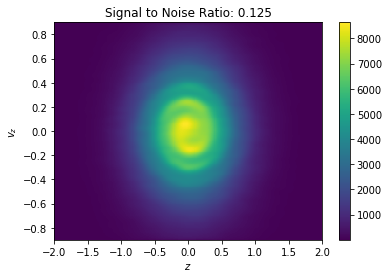

In [41]:
plt.pcolormesh(x, y, pdf2.T)
plt.colorbar()
plt.title("Signal to Noise Ratio: 0.125")
plt.xlabel("$z$")
plt.ylabel("$v_z$")
plt.savefig("s2n0p125_kde.png", dpi=300)
plt.show()

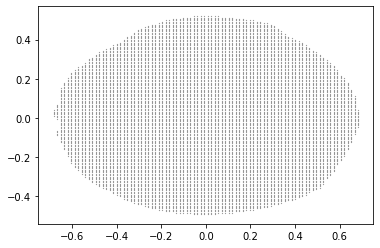

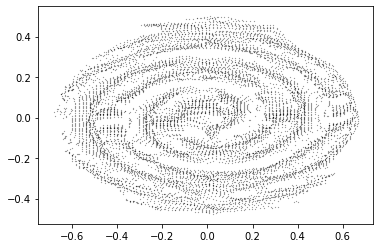

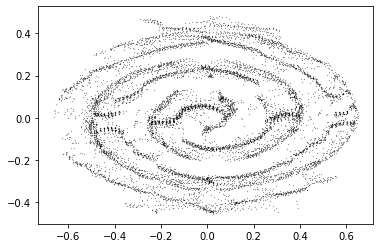

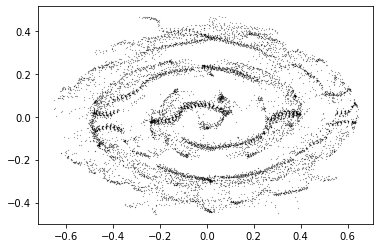

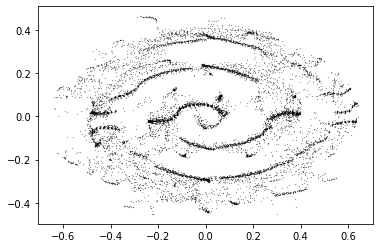

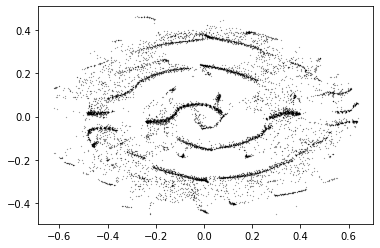

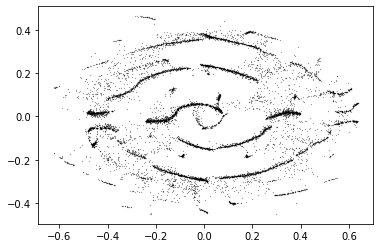

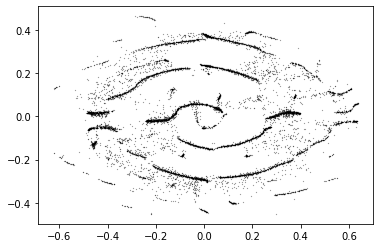

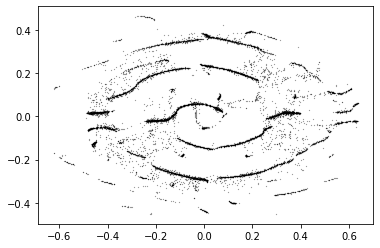

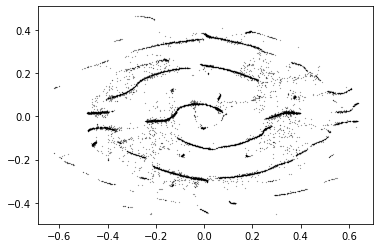

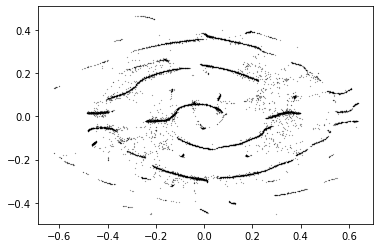

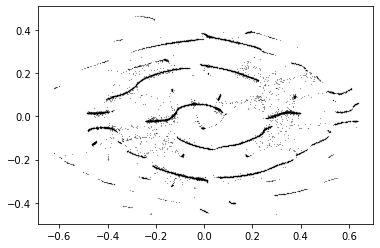

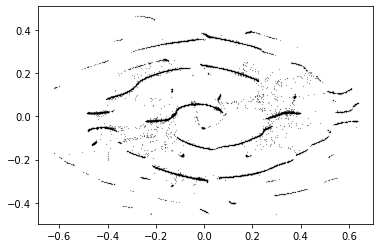

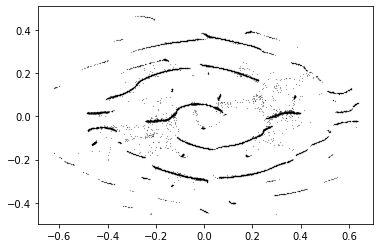

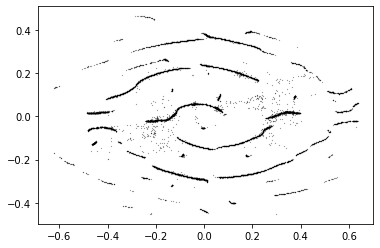

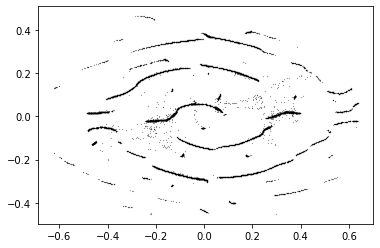

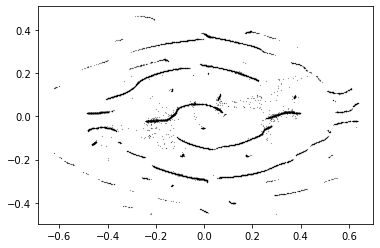

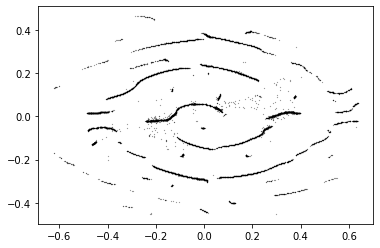

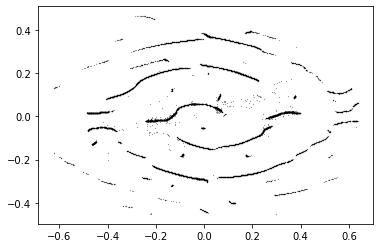

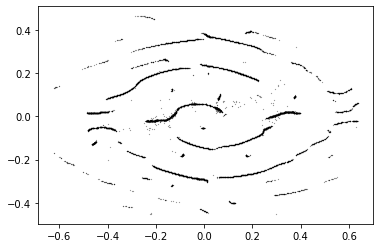

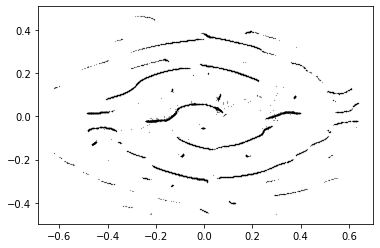

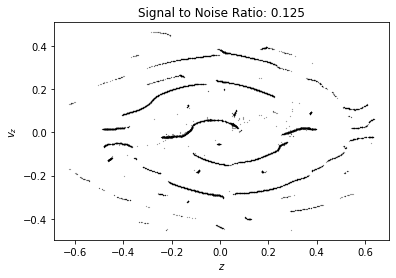

In [42]:
mesh_points = scms.generate_mesh2(x, y, 3000, pdf2)
plt.plot(mesh_points[:,0], mesh_points[:,1], 'k.', markersize=0.3)
plt.show()
dy, dx, dyy, dxx, dxy, dyx = kde.dkde2(points, x, y, bandwidth=bw)
dpdf = [dx, dy]
ddpdf = [dxx, dyy, dxy, dyx]
new_points = scms.scms2(mesh_points, x, y, pdf2, dpdf, ddpdf)
plt.plot(mesh_points[:,0], mesh_points[:,1], 'k.', markersize=0.3)
plt.title("Signal to Noise Ratio: 0.125")
plt.xlabel("$z$")
plt.ylabel("$v_z$")
plt.savefig("s2n0p125_res.png", dpi=300)
plt.show()